In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [10]:
with zipfile.ZipFile('EFIplus_medit.zip', 'r') as z:
    with z.open('EFIplus_medit.csv') as f:
        df = pd.read_csv(f, sep=";")

In [11]:
# Clean up unnecessary columns
df.drop(df.iloc[:, 5:15], axis=1, inplace=True)

In [12]:
# Rename columns
df.rename(columns={'Sum of Run1_number_all': 'Total_fish_individuals'}, inplace=True)

In [13]:
# Filter catchments with the highest number of sampling sites
top_catchments = df['Catchment_name'].value_counts().nlargest(4).index
df_selected = df[df['Catchment_name'].isin(top_catchments)]

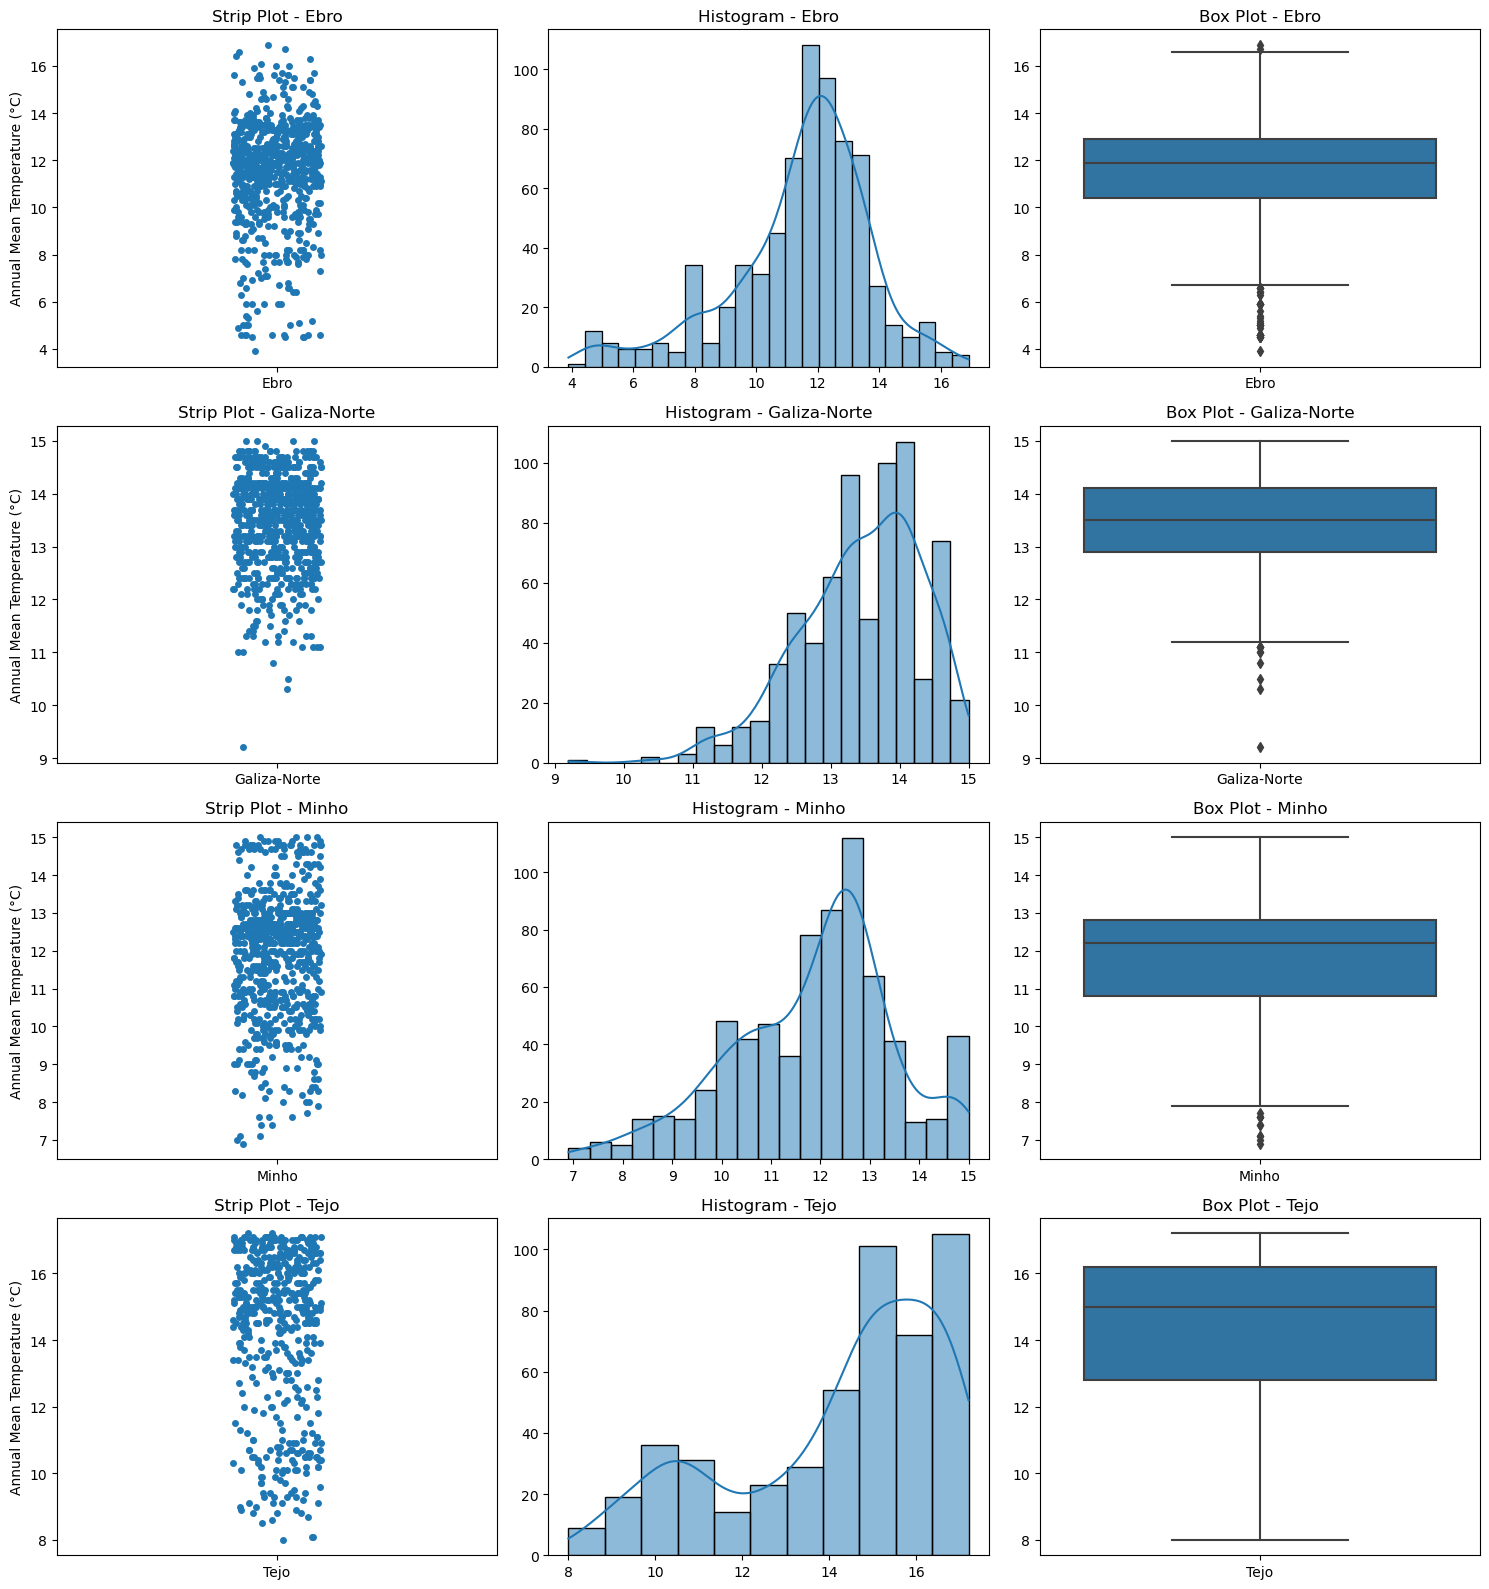

In [15]:
# Plotting univariate visualizations
fig, axs = plt.subplots(4, 3, figsize=(15, 16))

for i, catchment in enumerate(top_catchments):
    # Strip plot
    sns.stripplot(data=df_selected[df_selected['Catchment_name'] == catchment],
                  x='Catchment_name', y='temp_ann', ax=axs[i, 0])
    axs[i, 0].set_title(f'Strip Plot - {catchment}')
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('Annual Mean Temperature (°C)')
    
    # Histogram
    sns.histplot(data=df_selected[df_selected['Catchment_name'] == catchment],
                 x='temp_ann', ax=axs[i, 1], kde=True)
    axs[i, 1].set_title(f'Histogram - {catchment}')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('')
    
    # Box plot
    sns.boxplot(data=df_selected[df_selected['Catchment_name'] == catchment],
                x='Catchment_name', y='temp_ann', ax=axs[i, 2])
    axs[i, 2].set_title(f'Box Plot - {catchment}')
    axs[i, 2].set_xlabel('')
    axs[i, 2].set_ylabel('')

plt.tight_layout()
plt.show()

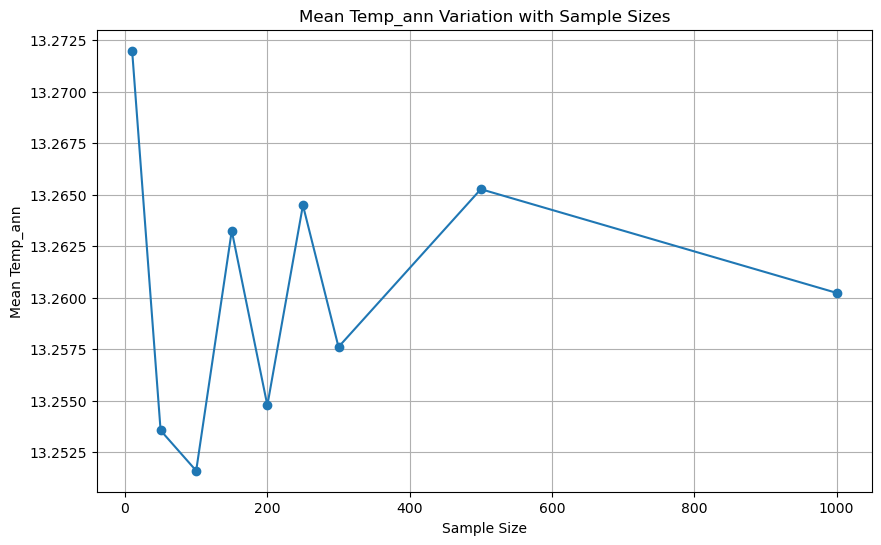

In [16]:
# Plotting mean temp_ann variation with sample sizes
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
sample_means = []

for size in sample_sizes:
    means = []
    for _ in range(1000):
        sample = np.random.choice(df['temp_ann'].dropna(), size=size, replace=True)
        means.append(np.mean(sample))
    sample_means.append(np.mean(means))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, sample_means, marker='o', linestyle='-')
plt.title('Mean Temp_ann Variation with Sample Sizes')
plt.xlabel('Sample Size')
plt.ylabel('Mean Temp_ann')
plt.grid(True)
plt.show()